<a href="https://colab.research.google.com/github/Omkar-githb/Celebal_Assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Online Sales Data.csv')

In [3]:
print(df.head())

   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  


In [4]:
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [6]:
df['Date'] = pd.to_datetime(df['Date'])


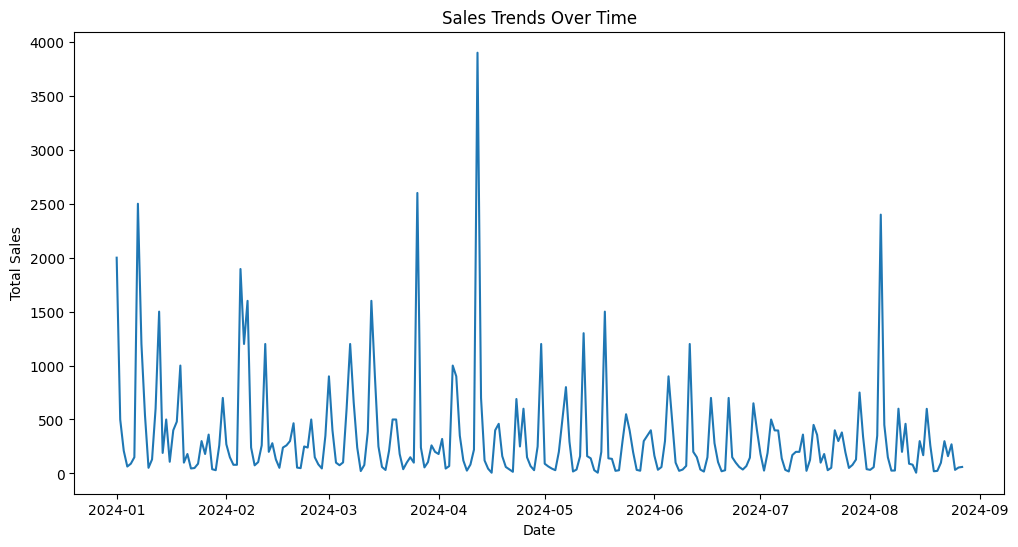

In [8]:
sales_trend = df.groupby('Date')['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_trend)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

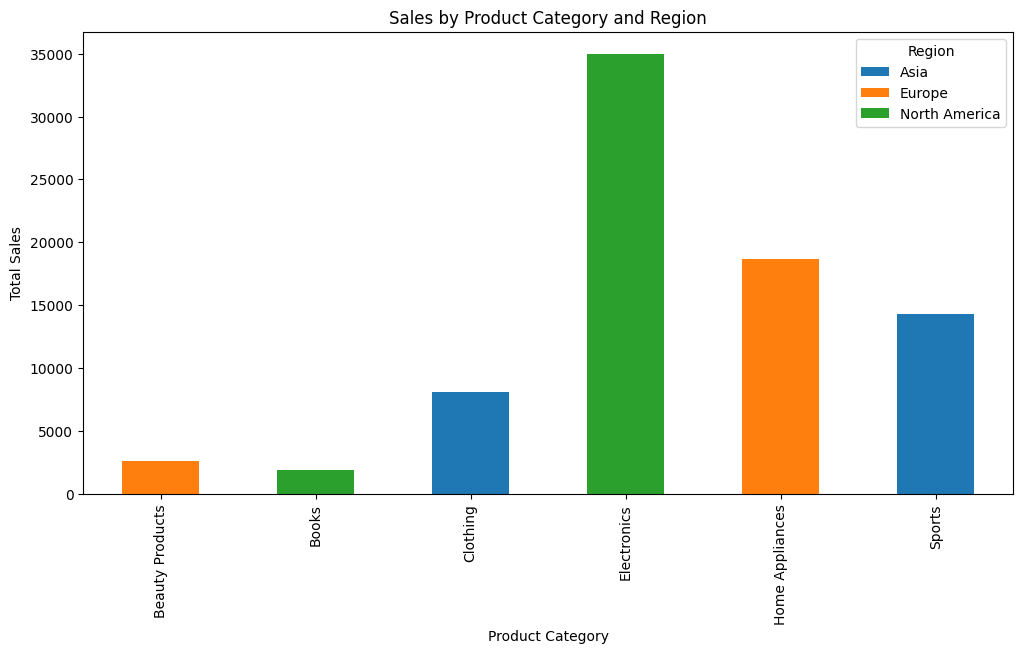

In [11]:
category_region_sales = df.groupby(['Product Category', 'Region'])['Total Revenue'].sum().unstack()

category_region_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales by Product Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.show()

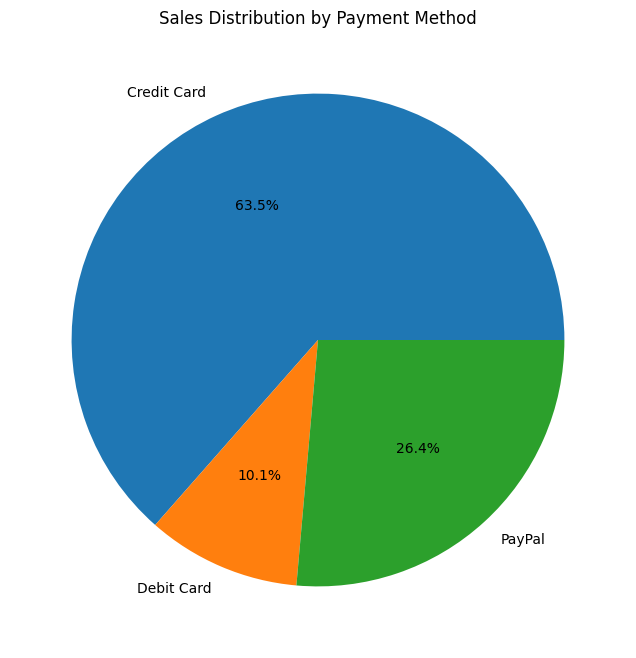

In [12]:
payment_method_sales = df.groupby('Payment Method')['Total Revenue'].sum()

plt.figure(figsize=(8, 8))
payment_method_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Payment Method')
plt.ylabel('')
plt.show()

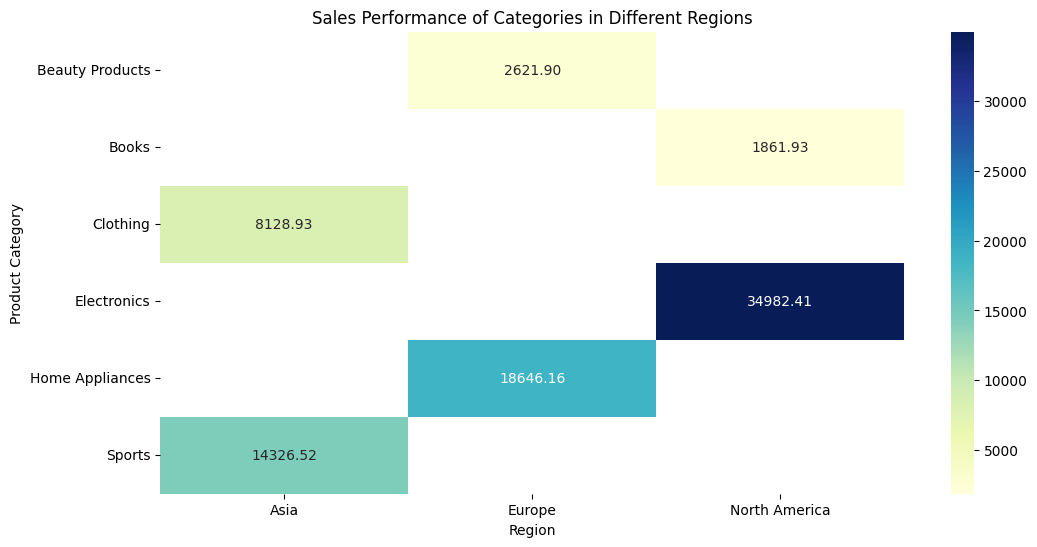

In [13]:
category_region_sales_heatmap = df.groupby(['Product Category', 'Region'])['Total Revenue'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(category_region_sales_heatmap, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Sales Performance of Categories in Different Regions')
plt.xlabel('Region')
plt.ylabel('Product Category')
plt.show()

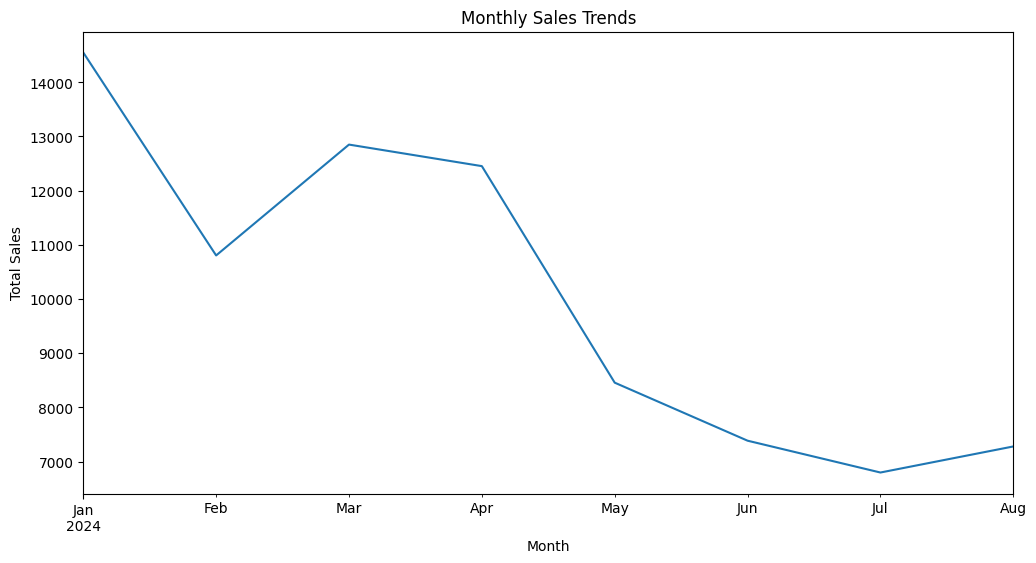

In [17]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


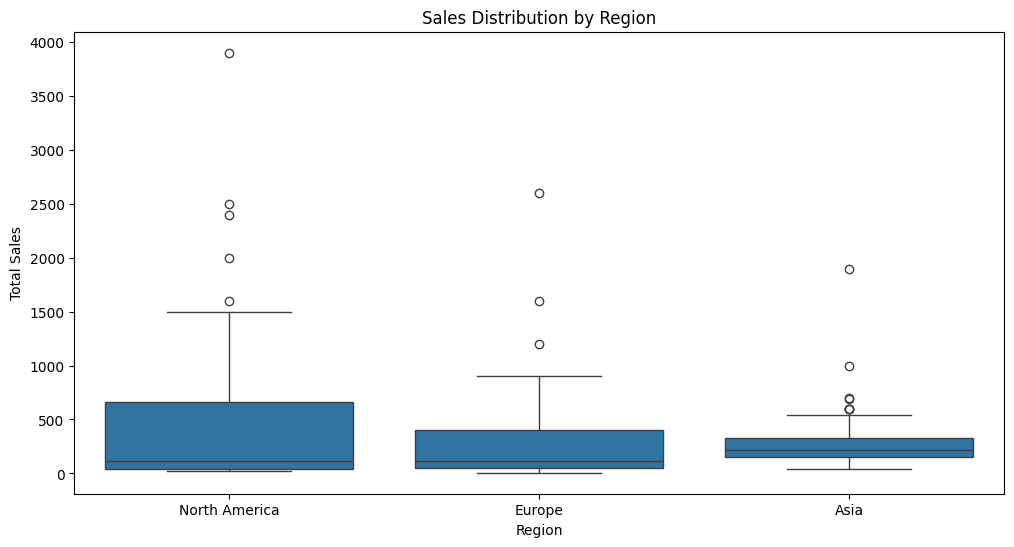

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

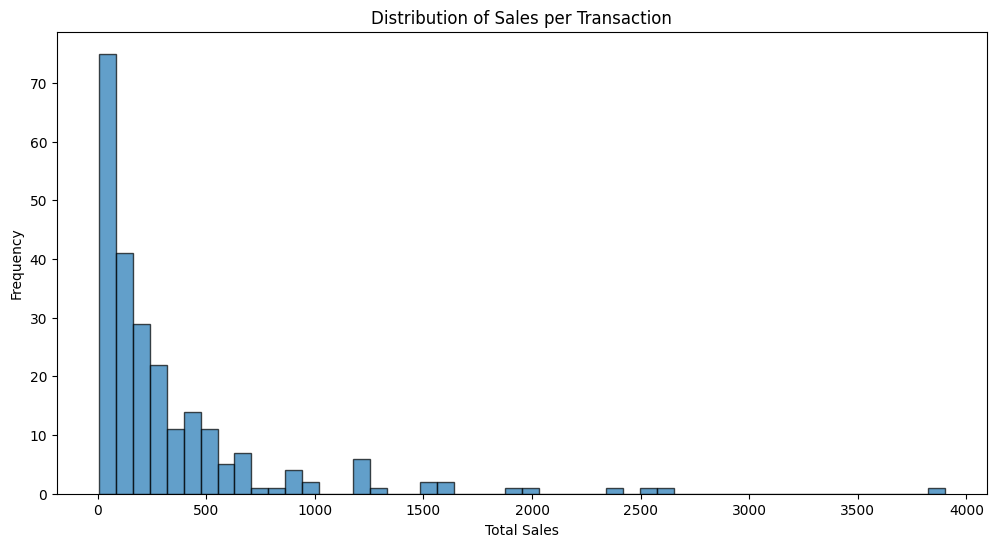

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(df['Total Revenue'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sales per Transaction')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

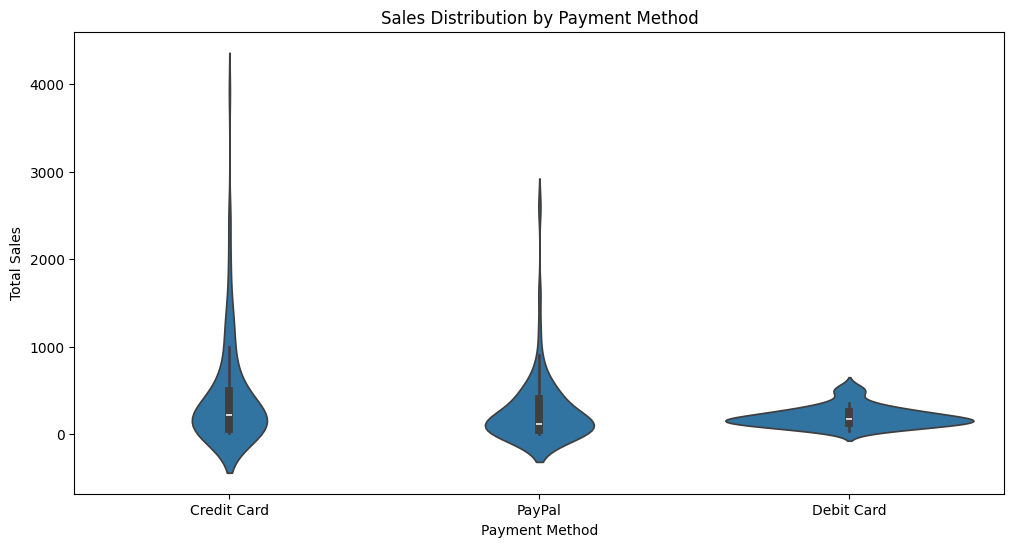

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Payment Method', y='Total Revenue', data=df)
plt.title('Sales Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()